In [1]:
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np

# plotting
import pandas as pd
import os
import matplotlib.pyplot as plt
os.environ['USE_PYGEOS'] = '0'
import geopandas as gpd
import rasterio
from rasterio.plot import show as rioshow
from shapely.geometry import Polygon
from geospatial_functions import get_background_map

In [2]:
# loading other layers
outline           = gpd.read_file(f"Data\\lena_basin_outline_polygon.gpkg",driver="GPKG")
main_rivers       = gpd.read_file(f"Data\\lena_main_river.gpkg",driver="GPKG")   
coast             = gpd.read_file(f"Data\\north_east_russian_coastlines.gpkg",driver="GPKG")   
# fixing crs
for layer in [outline,main_rivers,coast]:
    layer.geometry = layer.geometry.to_crs("EPSG:4326")

In [3]:
debug = False
if debug:
    fname1 = "Data\\anomally_waterhead_filtered_test_multicore_seperate1.nc" # debug
    fname2 = "Data\\anomally_waterhead_filtered_test_multicore_seperate2.nc"  # debug
else:
    fname1 = "Data\\anomally_waterhead_filtered_multicore_seperate1.nc" # debug
    fname2 = "Data\\anomally_waterhead_filtered_multicore_seperate2.nc"  # debug

In [4]:
ds1 = xr.open_dataset(fname1)
ds2 = xr.open_dataset(fname2)

C:\Users\david\anaconda3\envs\ship\Lib\site-packages\xarray\backends\plugins.py:71: RuntimeWarning: Engine 'cfgrib' loading failed:
Cannot find the ecCodes library
  warnings.warn(f"Engine {name!r} loading failed:\n{ex}", RuntimeWarning)


In [5]:
grace_names = np.loadtxt("Data\\grace_names_friendly.txt",delimiter=" ",dtype=str) 

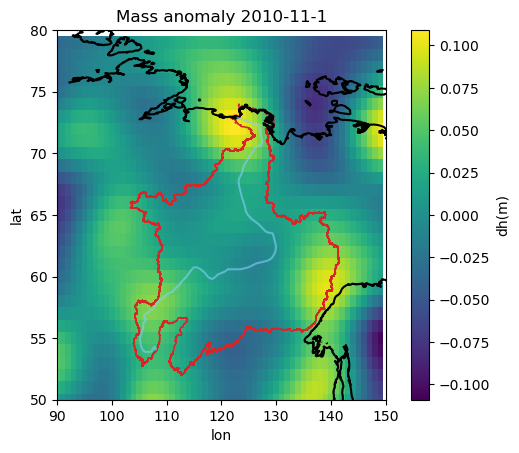

In [7]:
fig, ax = plt.subplots()
i = 100
data = ds1.isel(time=i)["dh(m)"] - ds2.isel(time=i)["dh(m)"]
data.plot(ax=ax,cmap="viridis")
# ds.isel(time=i).plot(ax=ax,cmap="viridis")
ax.set_title(f"Mass anomaly {grace_names[i]}")
outline.plot(ax=ax, edgecolor="C3", facecolor="None")
main_rivers.plot(ax=ax, color="lightskyblue",alpha=0.6,lw=1.5)

bounds = (90.0, 50.0, 150.0, 80.0)
coast.plot(ax=ax,color='k',zorder=1)
ax.set_xlim((bounds[0],bounds[2]))
ax.set_ylim((bounds[1],bounds[3]));